In [ ]:
!unzip -q /content/my_library_final.zip -d /content/

# XOR Neural Network Example

This text demonstrates a simple neural network built from scratch to solve the XOR problem using NumPy. The network has a 2-2-1 architecture, meaning it has 2 input neurons, 2 neurons in a hidden layer, and 1 output neuron.

## Dataset

We use the classic XOR truth table as the dataset. The network should learn to output 1 when the inputs differ and 0 when they are the same.

## Network Components

**Dense Layer**: Fully connected layer handling linear transformations.

**Activation Function (Sigmoid)**: Introduces non-linearity, mapping outputs between 0 and 1.

**Loss Function (MSE)**: Mean Squared Error, measuring the difference between predicted and true outputs.

**Optimizer (SGD)**: Stochastic Gradient Descent, updating weights based on computed gradients.

**Sequential Model**: Container that chains layers together, handling forward and backward passes.

## Training Process

The network trains for multiple epochs. Each epoch performs:

**Forward pass:** Compute the network’s prediction.

**Loss calculation:** Measure how far predictions are from true outputs.

**Backward pass:** Compute gradients via backpropagation.

**Weight update:** Adjust weights using the optimizer.

## Expected Output

The training prints the loss every 1000 epochs.

After training, predictions are shown for all XOR inputs.

**Note:** In this configuration, the network may not successfully learn XOR because a single hidden layer with 2 neurons and sigmoid activation is often insufficient. Predictions tend to be around 0.5 for all inputs.

## Classes and Functions

**Dense:** Fully connected layer.

**Sigmoid / Tanh:** Activation function.

**MSE:** Mean Squared Error loss.

**SGD:** Optimizer using gradient descent.

**Sequential:** Handles forward and backward passes for all layers.

## Summary

This notebook demonstrates the complete workflow of building and training a neural network from scratch: forward pass → loss computation → backward pass → weight update. It highlights the limitations of small networks and the importance of proper architecture for solving non-linear problems like XOR.

learning rate:

## Gradiant check ( Analytical vs Numerical):
For numerical the formula is: ∂L/∂W ≈ [L(W + ε) - L(W - ε)]/(2ε)








 i will test the weights of network, also the implementation of the backpropagation in our code.


In [ ]:
import sys
import numpy as np
from my_library_final import Dense, Sigmoid, MSE, SGD, Sequential , Tanh
x=np.array([[1,-1],[-1,-1],[1,1],[-1,1]])
y=np.array([[1],[0],[1],[0]])

test_layer = Dense(2,1,activation=Tanh())

## analytical gradient
model=Sequential([test_layer])
loss_fn = MSE()    ##   (soft max) طلاما مستخدمتش
out= model.forward(x)
loss=loss_fn.forward(out,y)

dA=loss_fn.backward()
model.backward(dA)
grad_analytical= test_layer.dW



## numerical gradient

rows, cols = test_layer.W.shape
epsilon= 1e-7


for i in range(rows):
        for j in range(cols):

            # أ) احتفظ بالوزن الأصلي عشان نرجعه تاني
            original_weight = test_layer.W[i, j]

            test_layer.W[i, j] = original_weight + epsilon
            output_plus = test_layer.forward(x)
            loss_plus = loss_fn.forward(output_plus, y)


            test_layer.W[i, j] = original_weight - epsilon
            output_minus = test_layer.forward(x)
            loss_minus = loss_fn.forward(output_minus, y)


            numerical_grad = (loss_plus - loss_minus) / (2 * epsilon)
            my_grad = grad_analytical[i, j]

            print(f"Analytical Gradient: {grad_analytical[i, j]}")
            print(f"Numerical Gradient: {numerical_grad}")

            #  رجع الوزن لأصلي
            test_layer.W[i, j] = original_weight

            # بنحسب الفرق النسبي عشان لو الأرقام صغيرة جداً
            numerator = abs(my_grad - numerical_grad)
            denominator = max(abs(my_grad), abs(numerical_grad)) + epsilon
            relative_error = numerator / denominator
            print(f"Relative Error: {relative_error}")
            print("")
            print("")
            print("")










Analytical Gradient: -0.6793151935587052
Numerical Gradient: -0.6793151924311402
Relative Error: 1.6598550643655787e-09



Analytical Gradient: 0.8304090639391816
Numerical Gradient: 0.8304090631794381
Relative Error: 9.149025845737584e-10





# user choices:


1st layer i/ps: 2

1st layer o/ps: 4


---


2nd layer i/ps: 4

2nd layer o/ps: 1



---
activation function : sigmoid, for both layers.


---



**learning rate**: 1



---

no. of iterations : 10000




---


In [ ]:
  import sys
  import numpy as np
  from my_library_final import Dense, Sigmoid, MSE, SGD, Sequential , Tanh
  # XOR dataset
  X = np.array([[0,0],[0,1],[1,0],[1,1]])
  y = np.array([[0],[1],[1],[0]])

  # Create tiny network: 2 inputs -> 2 hidden -> 1 output
  layers = [              ##    لسته عادي خالص
      Dense(2, 4, activation=Sigmoid()),
      Dense(4, 1, activation=Sigmoid())
  ]
  #intialize network
  model = Sequential(layers)
  loss_fn = MSE()    ##   (soft max) طلاما مستخدمتش
  optimizer = SGD(lr=1)

  # Training loop (just a few epochs)
  for epoch in range(10000):
      # Forward
      out = model.forward(X)
      loss = loss_fn.forward(out, y)

      # Backward
      dA = loss_fn.backward()
      model.backward(dA)

      # Update weights
      for layer in layers:
          optimizer.step(layer)

      if epoch % 1000 == 0:
          print(f"Epoch {epoch}, loss={loss}")

  # Test predictions
  pred = model.forward((10,9))
  print("Predictions:\n", pred)


Epoch 0, loss=0.255764515390975
Epoch 1000, loss=0.00879315873602205
Epoch 2000, loss=0.001923369944179814
Epoch 3000, loss=0.0010193959708074888
Epoch 4000, loss=0.0006824027545979179
Epoch 5000, loss=0.0005091442091693487
Epoch 6000, loss=0.00040441307848491914
Epoch 7000, loss=0.00033457063525632564
Epoch 8000, loss=0.000284811365321006
Epoch 9000, loss=0.0002476331915537359
Predictions:
 [[0.00974646]]


# Using tensorFlow

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
Predictions:
[[0.02875548]
 [0.936755  ]
 [0.9458372 ]
 [0.06684634]]


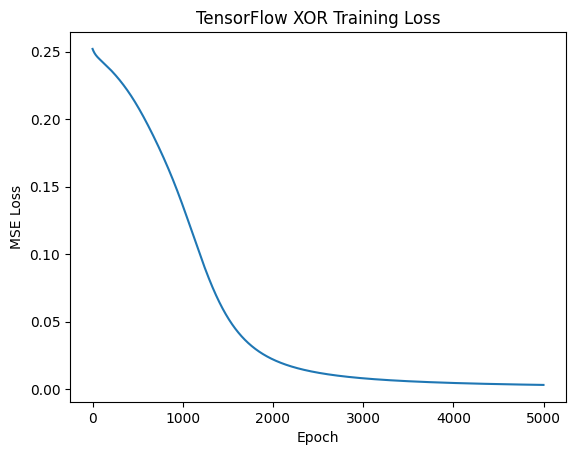

In [ ]:
#tensorflow for xor
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# XOR dataset
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])

# TensorFlow model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='tanh', input_shape=(2,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.075),
              loss='mse')

# Train
history = model.fit(X, y, epochs=5000, verbose=0)

# Predictions
preds = model.predict(X)
print("Predictions:")
print(preds)

# Plot loss curve
plt.plot(history.history['loss'])
plt.title("TensorFlow XOR Training Loss")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.show()
